# RL environments

In this book we will be using [gymnasium](https://gymnasium.farama.org/) for creating the RL environments. Gymnasium is a standard API for reinforcement learning, and a diverse collection of reference environments.

#### Running in Colab/Kaggle

If you are running this on Colab or Kaggle, please uncomment below cell and run this to install required dependencies.

In [1]:
#!pip install gymnasium[classic_control]

#### Importing required packages

In [2]:
import gymnasium as gym
from matplotlib import pyplot as plt

#### First Environment - Mountain Car

The [Mountain Car MDP](https://gymnasium.farama.org/environments/classic_control/mountain_car/) is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. There are two versions of the mountain car domain in gymnasium: one with discrete actions and one with continuous. This version is the one with discrete actions.

Each environment has to specify an `action space` which are the ways an agent/policy can interact with the environment. In case of Mountain car we have following possible actions:

There are 3 discrete deterministic actions:

0: Accelerate to the left<br/>
1: Don’t accelerate<br/>
2: Accelerate to the right<br/>

Each environment's state is defined as `Observation Space` - i.e. the part of the state this is visible to the agent to make decisions.

The observation for Mountain Car is a ndarray with shape (2,) where the elements correspond to the following:

| Num | Observation                          | Min   | Max  | Unit         |
|-----|--------------------------------------|-------|------|--------------|
| 0   | position of the car along the x-axis | -1.2  | 0.6  | position (m) |
| 1   | velocity of the car                  | -0.07 | 0.07 | velocity (v) |


We use an agent/policy to take an action using the following method in the `environment`<br/>
`action = policy(observation)`

Then we pass the action to the environment to act using `env.step(action)`. The function call returns a tuple of five values: `observation, reward, terminated, truncated, info`. the returned

- `observation` is the new state environment has moved into as a result of our action.
- `reward` is the numerical reward our agent gets from environment as a result of the action it took.
- `terminated` is a boolean which is true when the agent's action has resulted in completion of the task or agent has moved into a bad state (like falling off the cliff) from which it cannot recover. In other words, good or bad, the agent's action has resulted into a new state which is a terminal state from which agent cannot recover.
- `truncated` is a boolean which is true when the agent could not complete the task and timeout happens. There are a few other scenarios when this could happen as a result of other actions. You can read more about it in the documentation for `gymnasium`.
- `info` contains certain other information for debugging the environment

initial observation: [-0.5901667  0.       ]
possible actions: 3

taking action: 0
got reward: -1.0. New state/observation is: [-5.9067070e-01 -5.0405273e-04]

taking action: 0
got reward: -1.0. New state/observation is: [-0.5916751 -0.0010044]

taking action: 2
got reward: -1.0. New state/observation is: [-5.911725e-01  5.026300e-04]

taking action: 2
got reward: -1.0. New state/observation is: [-0.5891665   0.00200597]

taking action: 1
got reward: -1.0. New state/observation is: [-0.58667195  0.00249456]


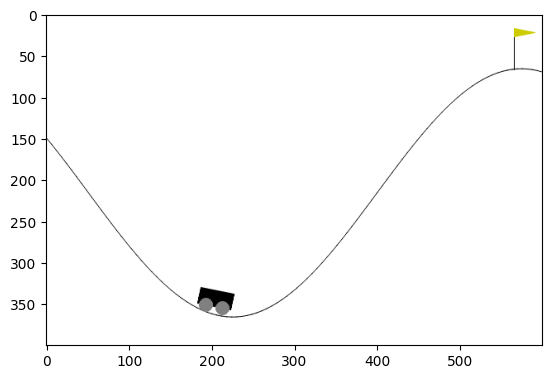

In [3]:

env = gym.make('MountainCar-v0', render_mode="rgb_array")
# reset environment and get initial observation/state
# Observation/state is a tuple of (position, velocity)
obs, info = env.reset()
print("initial observation:", obs)

# possible 3 actions
# {0: "accelerate to left", "1": "do nothing", "2": "accelerate to right"}
print("possible actions:", env.action_space.n)


# reinforcement learning is all
# about learning to take good actions
# from a given state/observation
# right now taking a random action
def policy(observation):
    return env.action_space.sample()


# take 5 random actions/steps
for _ in range(5):

    # to render environment for visual inspection
    # when you train, you can skip rendering to speed up
    plt.imshow(env.render())

    # based on current policy, use the current observation
    # to find the best action to take.
    action = policy(obs)
    print("\ntaking action:", action)

    # pass the action to env which will return back
    # with new state/"observation" and "reward"
    # there is a "done" flag which is true when game ends
    # "info" provides some diagnostic information
    obs, reward, terminated, truncated, info = env.step(action)
    print("got reward: {0}. New state/observation is: {1}".format(reward, obs))

# close the environment
env.close()

#### Second Environment Cart Pole

This [environment](https://gymnasium.farama.org/environments/classic_control/cart_pole/) corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “ Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem ”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

**Action Space**
The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with. `0` is the action to push the cart to the left and `1` is the action to push the cart to the right.

**Observation Space**
The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

| Num |      Observation      |         Min         |        Max        |
|:---:|:---------------------:|:-------------------:|:-----------------:|
| 0   | Cart Position         | -4.8                | 4.8               |
| 1   | Cart Velocity         | -Inf                | Inf               |
| 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3   | Pole Angular Velocity | -Inf                | Inf               |

initial observation: (array([ 0.018456  , -0.0142253 ,  0.04051789,  0.00331859], dtype=float32), {})
possible actions: 2

taking action: 1
got reward: 1.0. New state/observation is: [ 0.0181715   0.18029284  0.04058427 -0.27631015]

taking action: 1
got reward: 1.0. New state/observation is: [ 0.02177735  0.374813    0.03505806 -0.5559216 ]

taking action: 0
got reward: 1.0. New state/observation is: [ 0.02927361  0.17921682  0.02393963 -0.2524027 ]

taking action: 1
got reward: 1.0. New state/observation is: [ 0.03285795  0.3739889   0.01889157 -0.5374395 ]

taking action: 0
got reward: 1.0. New state/observation is: [ 0.04033773  0.1786065   0.00814279 -0.2388644 ]


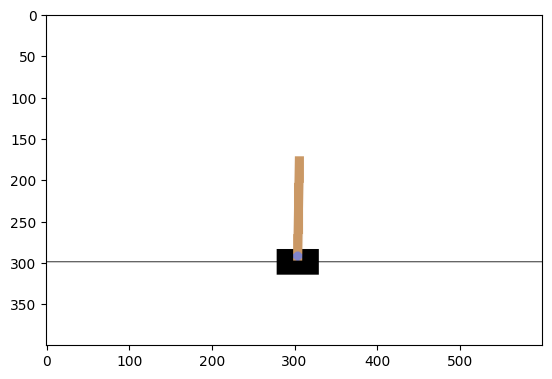

In [4]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
obs = env.reset()
print("initial observation:", obs)
print("possible actions:", env.action_space.n)


def policy(observation):
    return env.action_space.sample()


for _ in range(5):
    plt.imshow(env.render())

    action = policy(obs)
    print("\ntaking action:", action)

    obs, reward, terminated, truncated, info = env.step(action)
    print("got reward: {0}. New state/observation is: {1}".format(reward, obs))


# close the environment
env.close()